### Implementation for FGSM attack on a CNN classifier of MNIST dataset. 

In [1]:
import torch
from utils import data_loader
from mnist_classifier import NeuralModel
import numpy as np
import matplotlib.pyplot as plt
from utils.viewer import show_batch
import time
from multiple_attacks import *

In [2]:
train_set, test_set = data_loader.get_data()

batch_size = 512

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)

epsilons = [0, .05, .1, .15, .2, .25, .3]
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

classification_model = NeuralModel()
classification_model.load_state_dict(torch.load("models/trained_model"))


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [3]:
accuracies = []
examples = []

In [4]:
#Run test for each epsilon
fgsms = []
pgds = []
ifgsms = []
deepfools = []
for eps in epsilons:
    fgsms.append(attack(classification_model, device, test_loader, fgsm, eps)[0])

    pgds.append(attack(classification_model, device, test_loader, pgd, eps, 1e-2, 50)[0])

    ifgsms.append(attack(classification_model, device, test_loader, pgd_linf, eps, 1e4, 50)[0])

    deepfools.append(attack(classification_model, device, test_loader, pgd_l2, 1.3, eps, 50)[0])

FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 


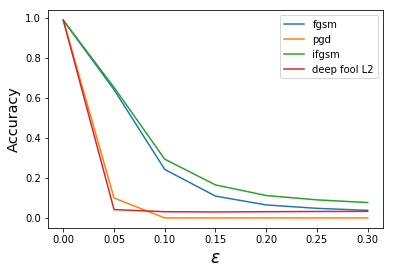

In [11]:

plt.plot(epsilons, fgsms, label = 'fgsm')
plt.plot(epsilons, pgds, label ="pgd")
plt.plot(epsilons, ifgsms, label = 'ifgsm')
plt.plot(epsilons, deepfools, label = 'deep fool L2')
plt.legend() 

plt.xlabel('$\epsilon$', size = 'xx-large', fontweight = 'demi')
plt.ylabel('Accuracy', size = 'x-large')
plt.savefig('figures/attacked_classifier_no_defense.pdf', format='pdf', bbox_inches='tight', quality = 100)

plt.show()